In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
def read_net_w(filename):
    # Функц 'read_net_w' нь өгөгдсөн filename (файл) дээрх мэдээллээс сүлжээ буюу граф үүсгэх үүрэгтэй.
    g = nx.Graph()  # NetworkX-ээр хоосон, эгц сүлжээ буюу граф объект үүсгэж байна.
    with open(filename) as f:  # Функц файл нээж, "f" хувьсагч руу өгөгдлийг унших зориулалттай холбож байна.
        f.readline()  # Файл дотроос эхний мөрийг уншиж, гарчиг буюу толгой мөрийг алгасаж байна.
        for l in f:  # Файл дахь үлдсэн мөр бүрийг давтан уншиж байна.
            l = l.split(",")  # Мөр бүрийг зап (",") тэмдгээр хувааж, жагсаалт (list) болгон хадгалж байна.
            # Хоосон графд: жагсаалтаас 0-дугаар элемент болон 1-дугаар элементийг-нодуудын нэр болгон,
            # 2-дугаар элементийг холболтын жинг (weight) int төрөлд хөрвүүлж нэмэж байна.
            g.add_edge(l[0], l[1], weight=int(l[2]))
    return g  # Бүх мөрийг боловсруулсны дараа үүсгэсэн сүлжээг (граф) буцааж өгч байна.

# Доорх мөрүүдээр "Game of Thrones" сериэсийн өгөгдлийг уншихыг үзүүлж байна.

season = 6  # "Game of Thrones" сериэсийн 6-р сезоны өгөгдлийг зааж байна.
g = read_net_w(f"/content/got-s6-edges.csv")  # Функцыг дуудан, сезоны өгөгдлийг агуулах CSV файлыг уншиж, граф үүсгэж байна.


In [ ]:
# Граф дахь "bridge" буюу салангид холболтууд байгаа эсэхийг шалгах
nx.has_bridges(g)

True

In [ ]:
# Граф дахь бүх "bridge" холболтуудыг жагсаах
list(nx.bridges(g))

[('JON', 'SAM'),
 ('JON', 'JEOR'),
 ('MISSANDEI', 'KRAZNYS_MO_NAKLOZ'),
 ('TYRION', 'AERYS'),
 ('DAVOS', 'SHIREEN'),
 ('SAM', 'MAESTER_AEMON'),
 ('CERSEI', 'MOUNTAIN'),
 ('TORMUND', 'MANCE'),
 ('HOUND', 'GATINS'),
 ('BRYNDEN', 'MINISA'),
 ('EDMURE', 'HOSTER'),
 ('QYBURN', 'ARTHUR_CHILD'),
 ('NED', 'RICKARD_STARK')]

In [ ]:
# Граф дахь локаль (orain) bridge-үүд болон тэдгээрийн span-ийг жагсаах
list(nx.local_bridges(g, with_span=True))

[('JON', 'SAM', inf),
 ('JON', 'JEOR', inf),
 ('MISSANDEI', 'KRAZNYS_MO_NAKLOZ', inf),
 ('TYRION', 'AERYS', inf),
 ('VARYS', 'STANNIS', 3),
 ('ARYA', 'WALDER', 3),
 ('DAVOS', 'SHIREEN', inf),
 ('SAM', 'MAESTER_AEMON', inf),
 ('CERSEI', 'MOUNTAIN', inf),
 ('TORMUND', 'MANCE', inf),
 ('HOUND', 'GATINS', inf),
 ('BRYNDEN', 'MINISA', inf),
 ('EDMURE', 'HOSTER', inf),
 ('QYBURN', 'ARTHUR_CHILD', inf),
 ('NED', 'RICKARD_STARK', inf)]

### Tie Strength - Холбоосын чадал

In [ ]:
# Функц: Хоёр төгсгөлтэй (нодтой) холбоосын хөрөгцөл (neighborhood) дэх хуваалцлыг тооцоолох
def node_overlap(g):
    for u, v in g.edges():
        n_u = set(g.neighbors(u))  # u-н хөрөгцөлд орших төгсгөлүүд
        n_v = set(g.neighbors(v))  # v-н хөрөгцөлд орших төгсгөлүүд
        # Хамтарсан хөрөгцлийн тоо / нийлбэр хөрөгцлийн тоо
        overlap = len(n_u & n_v) / len(n_u | n_v)
        # overlap утгыг холболтын өгөгдөлд нэмэх
        g[u][v]['Overlap'] = overlap
    return g

In [ ]:
# node_overlap функцээр графыг шинэчилж байна
g = node_overlap(g)

### Plotting the KDE (Kernel Density Estimation) of Neighborhood Overlap

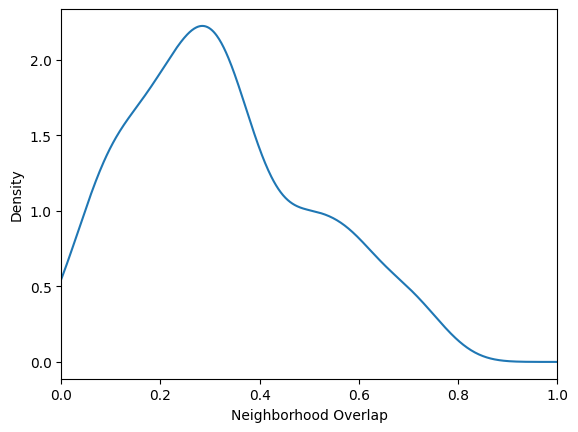

In [ ]:
# KDE (Kernel Density Estimation) графыг зурах: Neighborhood Overlap-ийн тархалтыг үзүүлэх
# Граф дахь бүх холболтын 'Overlap' аттрибутын утгуудыг нэгэн жагсаалт руу цуглуулах:
weights = [e[-1]['Overlap'] for e in g.edges(data=True)]
# Энд: g.edges(data=True) нь граф дахь бүх холболтыг (нод1, нод2, өгөгдөл) хэлбэрээр өгдөг ба e[-1] нь өгөгдлийн dictionary-ийг илэрхийлнэ.
# 'Overlap' гэдэг түлхүүрээр хадгалагдсан утгыг жагсаалтаас авч weights хувьсагчид хадгалж байна.
# weights жагсаалтыг pandas-ийн DataFrame болгож, 0-дугаар багана дээр KDE графыг зурах:
pd.DataFrame(weights)[0].plot.kde()
# Энд: DataFrame үүсгэснээр нэг баганатай өгөгдлийн хүснэгт бүрдэнэ. plot.kde() функц нь өгөгдлийн тархалтыг Kernel Density Estimation аргаар график болгон харуулна.
# Графийн x-оси нь "Neighborhood Overlap" гэсэн нэртэй болно:
plt.xlabel("Neighborhood Overlap")
# x-осийн хязгаарыг 0-1 гэсэн интервалд тохируулж байна:
plt.xlim(0, 1)
# Графыг дэлгэцэнд харуулах:
plt.show()

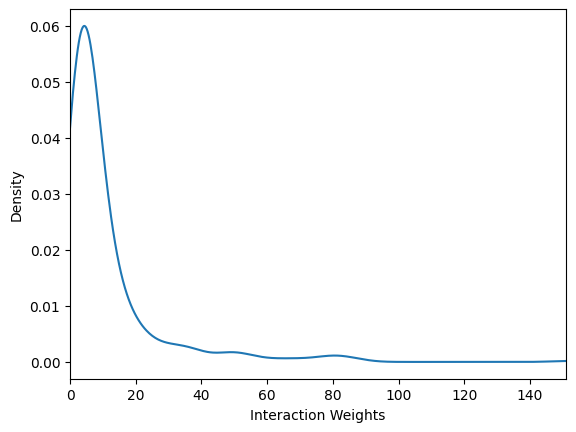

In [ ]:
# Холболтын жинг (interaction weight) ашиглан KDE графыг зурах
# Граф дахь бүх холболтын өгөгдлийн dictionary-с 'weight' түлхүүртэй утгуудыг гаргаж авч, weights_got жагсаалтад хадгалж байна.
weights_got = [d['weight'] for u, v, d in g.edges(data=True)]
# weights_got жагсаалтыг pandas-ийн DataFrame болгож, 0-дугаар багана дээр KDE (Kernel Density Estimation) графыг зурах.
pd.DataFrame(weights_got)[0].plot.kde()
# Графийн x-осийн нэрийг "Interaction Weights" гэж тохируулж байна.
plt.xlabel("Interaction Weights")
# x-осийн интервалыг 0-ээс эхлүүлж, weights_got дахь хамгийн их утга хүртэл тохируулж байна.
plt.xlim(0, max(weights_got))
# Бүх тохиргоо дууссаны дараа графыг дэлгэцэнд харуулж байна.
plt.show()

### Network Resilience

#### Generating Networks

In [ ]:
# Эрдо-Рени (Erdos-Renyi) сүлжээ үүсгэх: 1000 төгсгөл, холбоос үүсэх магадлал 0.0001
er = nx.erdos_renyi_graph(1000, 0.0001)
# Scale-Free сүлжээ үүсгэх: 1000 төгсгөл, шинэ төгсгөл нэгдэл холбоо барихдаа 2 холбоотой
ba = nx.barabasi_albert_graph(1000, 2)

#### ER and BA графуудын хувьд оройн зэрэгүүдийг тодорхойлов

In [ ]:
# ER ба BA сүлжээний төгсгөлүүдийн зэрэг (degree) тоог тодорхойлох
er_degs = list(dict(er.degree()).values())
ba_degs = list(dict(ba.degree()).values())

#### Molloy-Reed threshold тодорхойлох

In [ ]:
# Molloy-Reed хязгаар (threshold) тооцоолох функц
def molloy_reed(degrees):
    # Функц: 'degrees' массив дахь утгуудын дундаж дээр тулгуурлан Molloy-Reed хязгаарыг тооцоолдог.
    # np.mean(degrees) нь degrees массив дахь бүх утгуудын дундажыг олж өгдөг.
    # Тэгээд (дундаж + 1) болон дундажыг үржүүлж, эцэст нь дундажын утгаар хуваана.
    return (np.mean(degrees) * (np.mean(degrees) + 1)) / np.mean(degrees)


# Сүлжээ эвдэрч байх хязгаарыг тооцоолох функц
def breakdown_threshold(degrees):
    # degrees массивын дундаж дээр үндэслэн Molloy-Reed хязгаарыг тооцоолно.
    K = molloy_reed(degrees)
    # Сүлжээ эвдэрч байх хязгаарыг тооцоолоход:
    # 1 - (1 / (K - 1)) формулыг хэрэглэдэг.
    return 1 - (1 / (K - 1))

#### Random network

In [ ]:
# 'er_degs' массив дээр тулгуурлан Molloy-Reed хязгаарыг (K) тооцоолдог.
molloy_reed(er_degs)

np.float64(1.092)

In [ ]:
# molloy_reed ашиглан нодын степүүд (er_degs)-аас эвдэрч байх хязгаарыг 1 - (1/(K - 1)) тооцоолно.
breakdown_threshold(er_degs)

np.float64(-9.869565217391294)

#### Scale-free network

In [ ]:
# 'ba_degs' массив дээр тулгуурлан Molloy-Reed хязгаарыг (K) тооцоолдог.
molloy_reed(ba_degs)


np.float64(4.992)

In [ ]:
# molloy_reed ашиглан нодын степүүд (ba_degs)-аас эвдэрч байх хязгаарыг 1 - (1/(K - 1)) тооцоолно.
breakdown_threshold(ba_degs)

np.float64(0.7494989979959921)

### Random Failures

In [ ]:
# Функц: Санамсаргүйгээр графоос нэг төгсгөл устгах
def dismantle_node(g, *args):  # Графоос санамсаргүй төгсгөл сонгох функц. *args нь нэмэлт параметрүүдийг дэмжих.
    return [np.random.choice(g.nodes())]  # g.nodes() дотроос санамсаргүйгээр нэг төгсгөл сонгож, жагсаалтад байршуулна.

# Функц: Төгсгөлүүдийг ээлжлэн устгах, мөн хамгийн том компонентийн хэмжээ хэмжих
def dismantle(g, function, **args):
    total_nodes = g.number_of_nodes()  # Граф дахь нийт төгсгөлүүдийн тоог хадгална.
    removed_nodes = []  # Устгасан төгсгөлүүдийг хадгалах жагсаалт.
    components = []  # Хүснэгтийн алхам бүрт giant component-ийн харьцааг хадгалах жагсаалт.
    while len(g.nodes()) > 0:  # Граф дахь бүх төгсгөлүүдийг устгах хүртэл давталт хийх.
        n = function(g, **args)[0]  # Өгөгдсөн функцээр (жишээ нь dismantle_node) санамсаргүйгээр нэг төгсгөл сонгож аваад n хувьсагчид хадгална.
        g.remove_node(n)  # Сонгосон төгсгөл болон түүний холболтуудыг графоос устгана.
        removed_nodes.append((len(removed_nodes) + 1, n))  # Устгасан алхамын дугаар болон төгсгөл нэрийг жагсаалтад нэмнэ.
        comps = list(nx.connected_components(g))  # Одоогийн графын холбогдсон компонентуудыг олж авна.
        g_size = 0  # Хамгийн том компонентийн харьцааг эхний төлөвт 0 гэж онооно.
        if len(comps) > 0:  # Хэрэв компонентууд хоосон бус бол:
            g_size = max(len(c) for c in comps) / total_nodes  # Хамгийн том компонентийн төгсгөлүүдийн тоог эхний нийт төгсгөлөөр хуваана.
        components.append(g_size)  # Тооцоолсон giant component-ийн хэмжээг жагсаалтанд нэмнэ.
    return removed_nodes, components  # Устгасан төгсгөлүүдийн жагсаалт ба giant component-ийн хэмжээний хуваарийг буцаана.

# Функц: Төгсгөлүүдийг тодорхой үзүүлэлт (score)-ээр эрэмбэлж жагсаах
def get_sorted_nodes(g, score, reverse=True):
    nodes = score(g)  # g граф дээр өгөгдсөн үзүүлэлт (score) функцыг ашиглан нодуудын оноог авч байна.
    if isinstance(nodes, dict):  # Хэрэв үзүүлэлт dictionary хэлбэртэй бол:
        nodes = [(k, v) for k, v in nodes.items()]  # Dictionary-г (төгсгөл, оноо) хосуудын жагсаалт болгон хөрвүүлнэ.
    srt = sorted(nodes, key=lambda k: k[1], reverse=reverse)  # Онооны дагуу эрэмбэлж, reverse=True бол унасан дарааллаар эрэмбэлнэ.
    return [x[0] for x in srt]  # Эрэмбэлсэн жагсаалтаас зөвхөн төгсгөлүүдийг (нодуудыг) буцаана.

# Функц: Устгасан төгсгөлүүдийн жагсаалт болон giant component-ийн хэмжээг график болгон зурах
def plot_dismantle(removed_nodes, comps):
    # removed_nodes: [(1, node1), (2, node2), (3, node3), ...] – устгасан төгсгөлүүдийн алхам дугаар болон нэр.
    x = [step for step, node in removed_nodes]  # x-ос: устгасан алхамын дугааруудыг авна.
    y = comps  # y-ос: тухайн алхамд giant component-ийн харьцан үзүүлэлт (хэмжээ).
    plt.plot(x, y)  # x ба y утгуудыг ашиглан шугам граф зурах.
    plt.xlabel("Removal step")  # x-осын нэрийг "Removal step" гэж тохируулна.
    plt.ylabel("Giant Component size")  # y-осын нэрийг "Giant Component size" гэж тохируулна.
    plt.show()  # Графыг дэлгэцэнд харуулах.


#### Random Failures

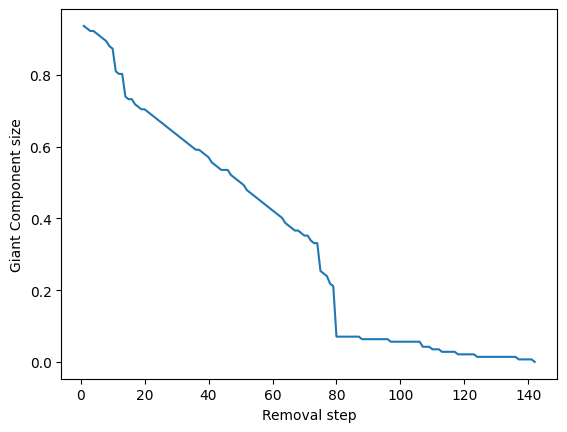

In [ ]:
# Санамсаргүй алдааны туршилт (Random Failures)
h = g.copy()  # Анхны графыг өөрчлөхгүй байх тул хуулбарыг үүсгэж байна.
rn, comps = dismantle(h, dismantle_node)  # dismantle функцээр санамсаргүйгээр төгсгөл устгаж, устгасан төгсгөлүүд (rn) болон giant component-ийн хэмжээг (comps) авч байна.
plot_dismantle(rn, comps)  # Устгасан төгсгөлүүдийн алхам ба giant component-ийн хэмжээг график дээр зурах.

### Targeted Attacks

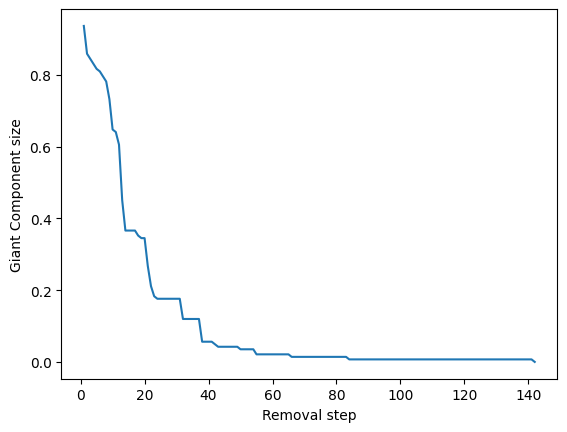

In [ ]:
# Зорилтот халдлага (Targeted Attacks) - төгсгөлүүдийг өндөр зэрэг (degree)ээр устгах
h = g.copy()  # Анхны графыг өөрчлөхөөс сэргийлэхийн тулд графын хуулбарыг үүсгэнэ.
rn, comps = dismantle(h, get_sorted_nodes, score=nx.degree)  # dismantle функц нь get_sorted_nodes функцийг ашиглан төгсгөлүүдийг өндөр degree-аар эрэмбэлж устгаж, устгасан төгсгөлүүд (rn) болон giant component-ийн хэмжээ (comps)-г буцаана.
plot_dismantle(rn, comps)  # Устгасан төгсгөлүүд болон giant component-ийн хэмжээг график дээр дүрслэнэ.


### Targeted Edge Attacks (based on Edge Betweenness Centrality)

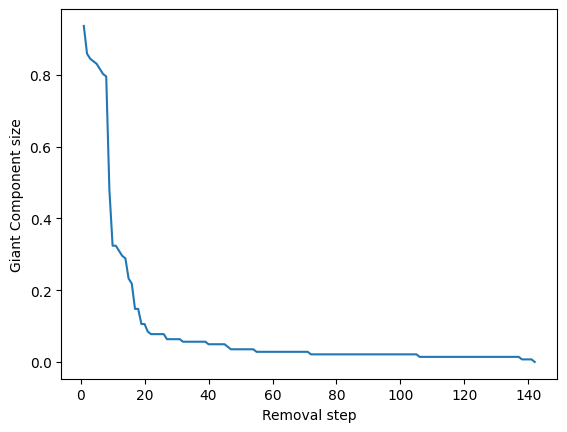

In [ ]:
# Зорилтот халдлага: төгсгөлүүдийг betweenness centrality-аар эрэмбэлж устгах
h = g.copy()  # Эх графын хуулбарыг үүсгэж, үндсэн графыг өөрчлөхөөс сэргийлнэ.
rn, comps = dismantle(h, get_sorted_nodes, score=nx.betweenness_centrality)  # Betweenness centrality-аар оноогоор эрэмбэлж төгсгөлүүдийг устгаж, giant component-ийн хэмжээг тодорхойлно.
plot_dismantle(rn, comps)  # Устгасан төгсгөлүүдийн алхам болон giant component-ийн хэмжээний өөрчлөлтийг график дээр дүрслэнэ.

### Targeted Edge Attacks (based on Edge Harmonic Centrality)

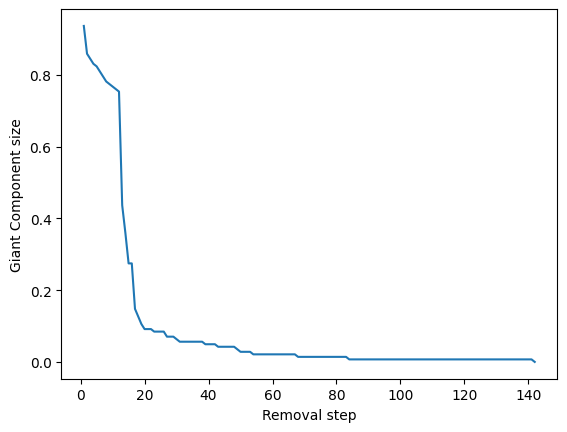

In [ ]:
# Өөр нэг зорилтот халдлага (Targeted Edge Attacks) - төгсгөлүүдийг harmonic centrality-аар эрэмбэлж устгах
h = g.copy() # Графын хуулбарыг үүсгэж байна.
rn, comps = dismantle(h, get_sorted_nodes, score=nx.harmonic_centrality) # harmonic centrality-аар эрэмбэлж төгсгөл устгаж giant component-ийн хэмжээг олж байна.
plot_dismantle(rn, comps) # Устгасан төгсгөлүүд болон giant component-ийн хэмжээг график дээр дүрслэнэ.